#Egg prediction production

### About dataset

Creating a dataset that combines humidex, air quality, and water quality to predict egg production in poultry involves integrating data from multiple sources and understanding the complex interactions between environmental conditions and poultry health.
Context1

Poultry Farming: Egg production is a critical aspect of poultry farming. Farmers aim to optimize conditions to maximize yield.
Environmental Impact: Environmental factors like temperature, humidity, and air quality significantly affect the health and productivity of poultry.
Humidex: This index measures perceived temperature, combining temperature and humidity, which impacts poultry comfort and stress levels.
Air Quality: Pollutants like ammonia, carbon dioxide, and dust can affect respiratory health and overall well-being of poultry.
Water Quality: Clean water with balanced pH and low contamination levels is crucial for the health and productivity of poultry.
Sources
Humidex Data:
Weather Stations: Local meteorological stations provide temperature and humidity data.
Online Weather Services: APIs like OpenWeatherMap or Weather.com can offer historical and real-time weather data.
Air Quality Data:
-Environmental Monitoring Agencies: Government or private organizations monitor air quality parameters.
-Air Quality Sensors: On-farm sensors measure pollutants specific to the poultry environment.
Water Quality Data:
-On-Site Water Testing: Regular tests for pH, nitrates, bacteria, and other contaminants.
-Local Water Authorities: Reports and data from municipal water supplies or natural water sources.
Egg Production Data:
-Farm Records: Daily or weekly records of egg production.
-Poultry Management Systems: Software that tracks various aspects of poultry farming, including production metrics.

In [1]:
import pandas as pd

In [2]:
egg_1 = pd.read_csv('egg_production_predict_poultry.csv')
egg_1

,Unnamed: 0,AQI,WQI,Humidex,Production
0,0,21.957796,95.950538,35.016212,High
1,1,8.731716,88.559769,35.822153,High
2,2,8.402340,93.361755,34.277358,High
3,3,14.466574,98.947226,33.320641,High
4,4,15.774947,94.584586,30.619136,High
...,...,...,...,...,...
1495,1495,231.593795,37.635504,57.094668,Low
1496,1496,157.352569,7.281023,56.858129,Low
1497,1497,166.108488,0.014403,51.625506,Low
1498,1498,443.975620,21.000767,48.024332,Low


In [3]:
egg_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1500 non-null   int64  
 1   AQI         1500 non-null   float64
 2   WQI         1500 non-null   float64
 3   Humidex     1500 non-null   float64
 4   Production  1500 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 58.7+ KB


In [8]:
egg_1_new = egg_1.drop(columns=egg_1.columns[egg_1.columns.str.contains('Unnamed')])

In [9]:
egg_1_new.head()

,AQI,WQI,Humidex,Production
0,21.957796,95.950538,35.016212,High
1,8.731716,88.559769,35.822153,High
2,8.402340,93.361755,34.277358,High
3,14.466574,98.947226,33.320641,High
4,15.774947,94.584586,30.619136,High


In [10]:
nuevo_orden = ['Production','AQI','WQI','Humidex']
egg =egg_1_new[nuevo_orden]

In [18]:
egg.cumsum

<bound method DataFrame.cumsum of      Production         AQI        WQI    Humidex
0          High   21.957796  95.950538  35.016212
1          High    8.731716  88.559769  35.822153
2          High    8.402340  93.361755  34.277358
3          High   14.466574  98.947226  33.320641
4          High   15.774947  94.584586  30.619136
...         ...         ...        ...        ...
1495        Low  231.593795  37.635504  57.094668
1496        Low  157.352569   7.281023  56.858129
1497        Low  166.108488   0.014403  51.625506
1498        Low  443.975620  21.000767  48.024332
1499        Low  443.093485  21.781599  58.197795

[1500 rows x 4 columns]>

In [19]:
egg.isnull().sum()

Production    0
AQI           0
WQI           0
Humidex       0
dtype: int64

In [21]:
Production_labels = {'High':2,'Medium': 1, 'Low': 0}

egg['Production'] = egg['Production'].map(Production_labels)

In [23]:
egg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Production  1500 non-null   int64  
 1   AQI         1500 non-null   float64
 2   WQI         1500 non-null   float64
 3   Humidex     1500 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 47.0 KB


In [24]:
import seaborn as sns

In [28]:
variables = egg.drop(columns='Production')
print(variables)

             AQI        WQI    Humidex
0      21.957796  95.950538  35.016212
1       8.731716  88.559769  35.822153
2       8.402340  93.361755  34.277358
3      14.466574  98.947226  33.320641
4      15.774947  94.584586  30.619136
...          ...        ...        ...
1495  231.593795  37.635504  57.094668
1496  157.352569   7.281023  56.858129
1497  166.108488   0.014403  51.625506
1498  443.975620  21.000767  48.024332
1499  443.093485  21.781599  58.197795

[1500 rows x 3 columns]


In [29]:
quantile_1 = variables.quantile(0.25)
quantile_3 = variables.quantile(0.75)

IQR= quantile_3 - quantile_1 

LIM_INF = quantile_1 - 1.5 * IQR
LIM_SUP = quantile_3 + 1.5 * IQR

print(f'limite_inferior es: {LIM_INF}, limite_superior es: {LIM_SUP}')
LIMITES_INF = LIM_INF
LIMITES_SUP = LIM_SUP

limite_inferior es: AQI       -203.546794
WQI        -53.505334
Humidex     14.322904
dtype: float64, limite_superior es: AQI        439.811999
WQI        168.376703
Humidex     69.521205
dtype: float64


-203.54679408124997 439.81199884874997


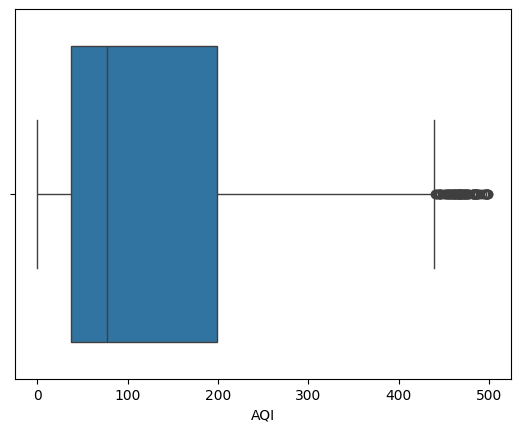

In [30]:
sns.boxplot(x=egg['AQI'])
print(LIMITES_INF['AQI'],LIMITES_SUP['AQI'])

In [43]:
outliers = egg['AQI'] > LIMITES_SUP['AQI']
outliers

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498     True
1499     True
Name: AQI, Length: 1500, dtype: bool

In [45]:
media_AQI = egg.loc[~outliers, 'AQI'].mean()
media_AQI

np.float64(114.73346407552303)

### reemplazo de outliers por media

In [46]:
egg.loc[outliers,'AQI'] = media_AQI

-53.505333645 168.376702875


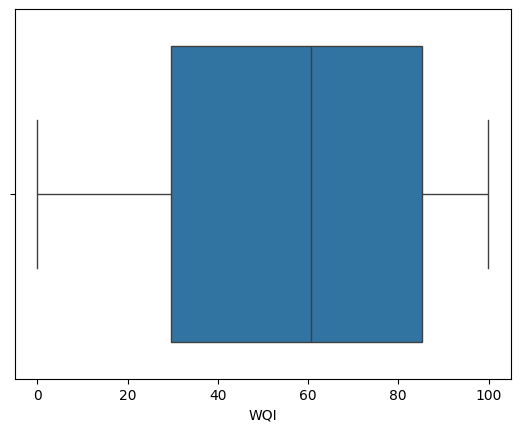

In [31]:
sns.boxplot(x=egg['WQI'])
print(LIMITES_INF['WQI'],LIMITES_SUP['WQI'])

14.322903904999993 69.521205365


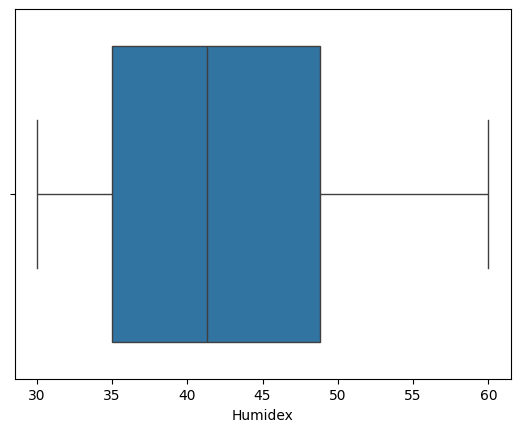

In [32]:
sns.boxplot(x=egg['Humidex'])
print(LIMITES_INF['Humidex'],LIMITES_SUP['Humidex'])

In [33]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

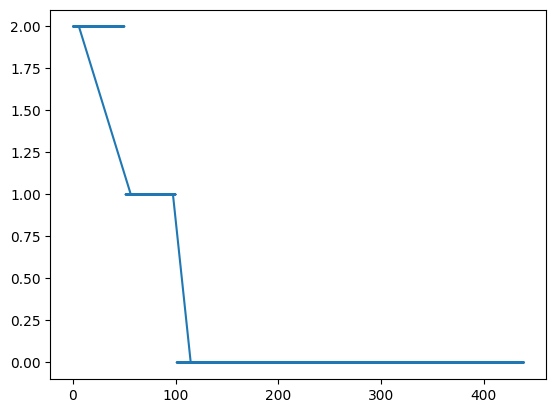

In [48]:
plt.plot(egg['AQI'],egg['Production'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

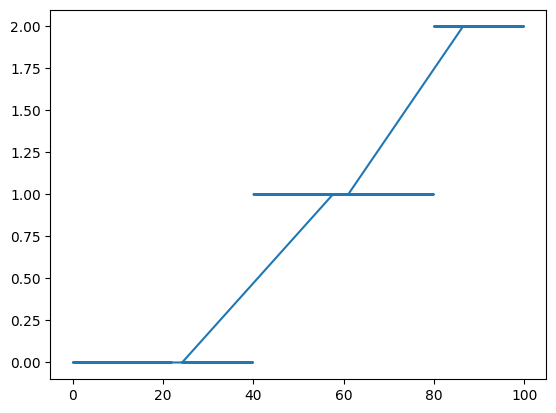

In [40]:
plt.plot(egg['WQI'],egg['Production'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

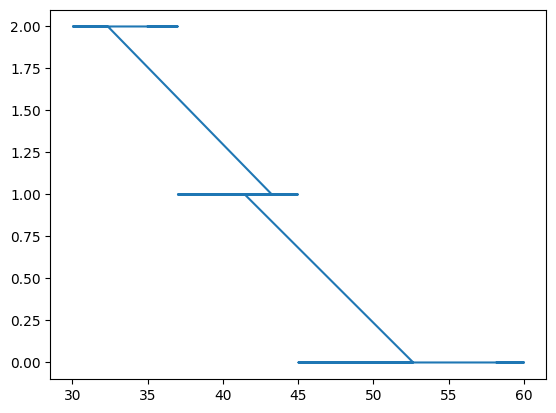

In [39]:
plt.plot(egg['Humidex'],egg['Production'])
plt.show